# Exploratory Data Analysis - AlMetric research paper

In this file we are going to perform an exploratory data analysis for AlMetric data. Please have in mind the methodology in use, i.e. CRISP-DM have some stages such as data retention, data cleaning and etc. which is necessary for EDA, except data retention which is done via AlMetric platform, other necessary steps will be done in this notebook. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
pd.options.display.max_columns = 200
sns.set_theme(style='darkgrid')

## Data Gathering

In this section we are going to import the gathered data in the code for further analysis.

In [2]:
atu = pd.read_csv('data/allameh.csv')
atu['University'] = "Allameh Tabataba'i University"

aut = pd.read_csv('data/amirkabir.csv')
aut['University'] = "Amir Kabir University"

sbu = pd.read_csv('data/beheshti.csv')
sbu['University'] = "Shahid Beheshti University"

fum = pd.read_csv('data/ferdowsi.csv')
fum['University'] = "Ferdowsi University of Mashhad"

ugui = pd.read_csv('data/guilan.csv')
ugui['University'] = "University of Guilan"

ihu = pd.read_csv('data/imamhosein.csv')
ihu['University'] = "Imam Hossein University"

uisf = pd.read_csv('data/isfahan.csv')
uisf['University'] = "University of Isfahan"

iut = pd.read_csv('data/iut.csv')
iut['University'] = "Isfahan University of Technology"

knu = pd.read_csv('data/knu.csv')
knu['University'] = "K. N. Toosi University of Technology"

sut = pd.read_csv('data/sharif.csv')
sut['University'] = "Sharif University of Technology"

ushi = pd.read_csv('data/shiraz.csv')
ushi['University'] = "University of Shiraz"

iust = pd.read_csv('data/stu.csv')
iust['University'] = "Iran University of Science and Technology"

utab = pd.read_csv('data/tabriz.csv')
utab['University'] = "University of Tabriz"

tmu = pd.read_csv('data/tarbiatmodares.csv')
tmu['University'] = "Tarbiat Modares University"

uteh = pd.read_csv('data/ut.csv')
uteh['University'] = "University of Tehran"

## Data Transformation

In the next section we are going to transform imported data to our needs and some feature generations are in order, i.e. label encoding two categorical variables, renaming features for standard pandas practice and etc.

In [3]:
df = pd.concat([atu, aut, sbu, fum, ugui, ihu, uisf, iut,
                knu, sut, ushi, iust, utab, tmu, uteh])

df.drop(['Authors at my Institution', 'Departments', 'Journal ISSNs', 'Sustainable Development Goals', 'ISBN', 'National Clinical Trial ID', 'URI', 'PubMed ID', 'PubMedCentral ID', 'Handle.net IDs', 'ADS Bibcode', 'arXiv ID', 'RePEc ID', 'SSRN', 'URN', 'Details Page URL', 'Badge URL', 'Syllabi mentions', 'DOI', 'Funder'], axis=1, inplace=True)

df.columns = df.columns.str.replace(' ', '_')
df = df.reset_index(drop=True)

label_encoder = preprocessing.LabelEncoder()
df['Output_Type_LE'] = label_encoder.fit_transform(df['Output_Type'])
df['OA_Status_LE'] = label_encoder.fit_transform(df['OA_Type'])
df['Publication_Date'] = pd.to_datetime(df['Publication_Date'])

In [4]:
df

,Altmetric_Attention_Score,Title,Journal/Collection_Title,Output_Type,OA_Status,OA_Type,Subjects_(FoR),Affiliations_(GRID),Publication_Date,News_mentions,Blog_mentions,Policy_mentions,Patent_mentions,Twitter_mentions,Peer_review_mentions,Weibo_mentions,Facebook_mentions,Wikipedia_mentions,Google+_mentions,LinkedIn_mentions,Reddit_mentions,Pinterest_mentions,F1000_mentions,Q&A_mentions,Video_mentions,Number_of_Mendeley_readers,Number_of_Dimensions_citations,Publisher_Names,University,Output_Type_LE,OA_Status_LE
0,1629,COVID-19 and male reproductive function: a pro...,Reproduction,Article,True,bronze,11 Medical and Health Sciences; 1114 Paediatri...,Allameh Tabataba'i University; University of G...,2021-03-01,87,1,0,0,2537,0,0,2,1,0,0,0,0,0,0,0,112,50,NaN,Allameh Tabataba'i University,0,0
1,906,The effects of three different exercise modali...,Reproduction,Article,True,bronze,11 Medical and Health Sciences; 1103 Clinical ...,"Academic Center for Education, Culture and Res...",2017-02-01,128,1,0,0,22,0,0,6,0,2,0,1,0,0,0,0,117,38,NaN,Allameh Tabataba'i University,0,0
2,239,"Fear, Loss, Social Isolation, and Incomplete G...",Basic And Clinical Neuroscience,Article,True,gold,11 Medical and Health Sciences; 1117 Public He...,Allameh Tabataba'i University; Charles R. Drew...,2020-07-30,30,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,190,52,NaN,Allameh Tabataba'i University,0,2
3,175,Foundations of Social Policy and Welfare in Islam,NaN,Chapter,False,closed,16 Studies in Human Society; 1605 Policy and A...,Allameh Tabataba'i University,2020-12-19,21,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,2,Springer Nature,Allameh Tabataba'i University,2,1
4,102,Laughter yoga versus group exercise program in...,International Journal of Geriatric Psychiatry,Article,True,green,11 Medical and Health Sciences; 1103 Clinical ...,Allameh Tabataba'i University; Imam Khomeini H...,2010-09-16,9,3,2,0,3,0,0,0,1,0,0,0,0,0,0,0,317,131,ESSOAr; Natural History Museum; Wiley,Allameh Tabataba'i University,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74004,0,AN AHP MODEL FOR CROP PLANNING WITHIN IRRIGATI...,Irrigation & Drainage,Article,False,closed,09 Engineering; 0905 Civil Engineering; 30 Agr...,University of Tehran,2011-09-29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,7,ESSOAr; Natural History Museum; Wiley,University of Tehran,0,1
74005,0,GC–MS Determination of PAHs in Fish Samples Fo...,Chromatographia,Article,False,closed,03 Chemical Sciences; 0301 Analytical Chemistr...,University of Tehran,2011-07-14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,14,Springer Nature,University of Tehran,0,1
74006,0,Interface thermal resistance and thermal recti...,Applied Physics Letters,Article,False,closed,02 Physical Sciences; 09 Engineering; 10 Techn...,University of Tehran,2011-08-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,103,American Institute of Physics (AIP),University of Tehran,0,1
74007,0,The systematic importance of anatomical data i...,Botanical Journal of the Linnean Society,Article,True,bronze,06 Biological Sciences; 0603 Evolutionary Biol...,Queen Mary University of London; Royal Botanic...,2010-10-11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,7,Oxford University Press (OUP); Wiley,University of Tehran,0,0


First thing first, we must compare the number of article for each university. In the plot below, you can see the number of artciles per university, sorted in a descending order.

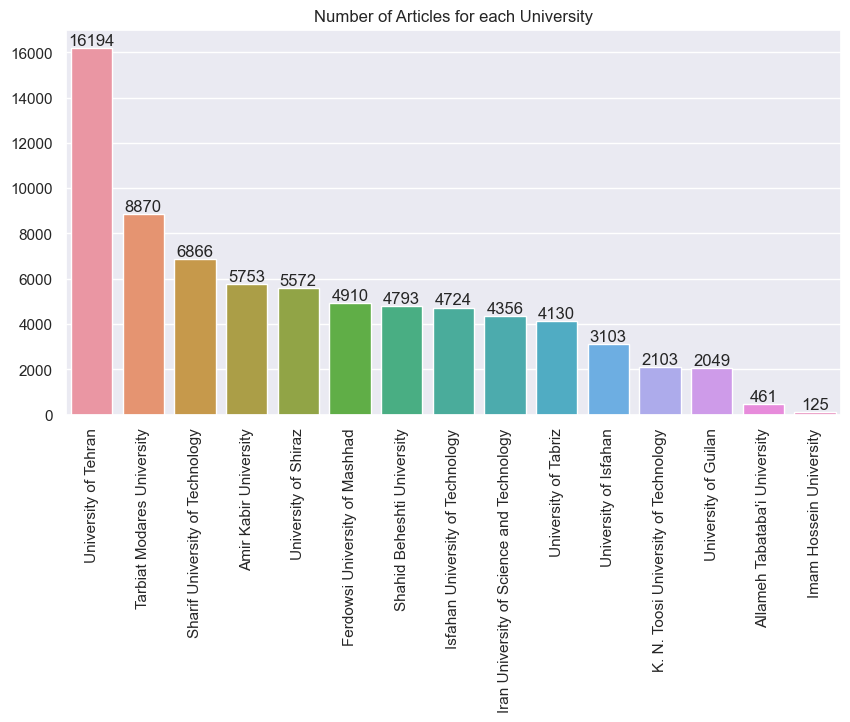

In [5]:
x = list(df['University'].value_counts().index)
y = list(df['University'].value_counts())
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=df, x=x, y=y)
ax.bar_label(ax.containers[0])
plt.title('Number of Articles for each University')
plt.xticks(rotation=90)
plt.show()

In the plot below, you can see the top 30 journal or collection in which universities have published their research output.

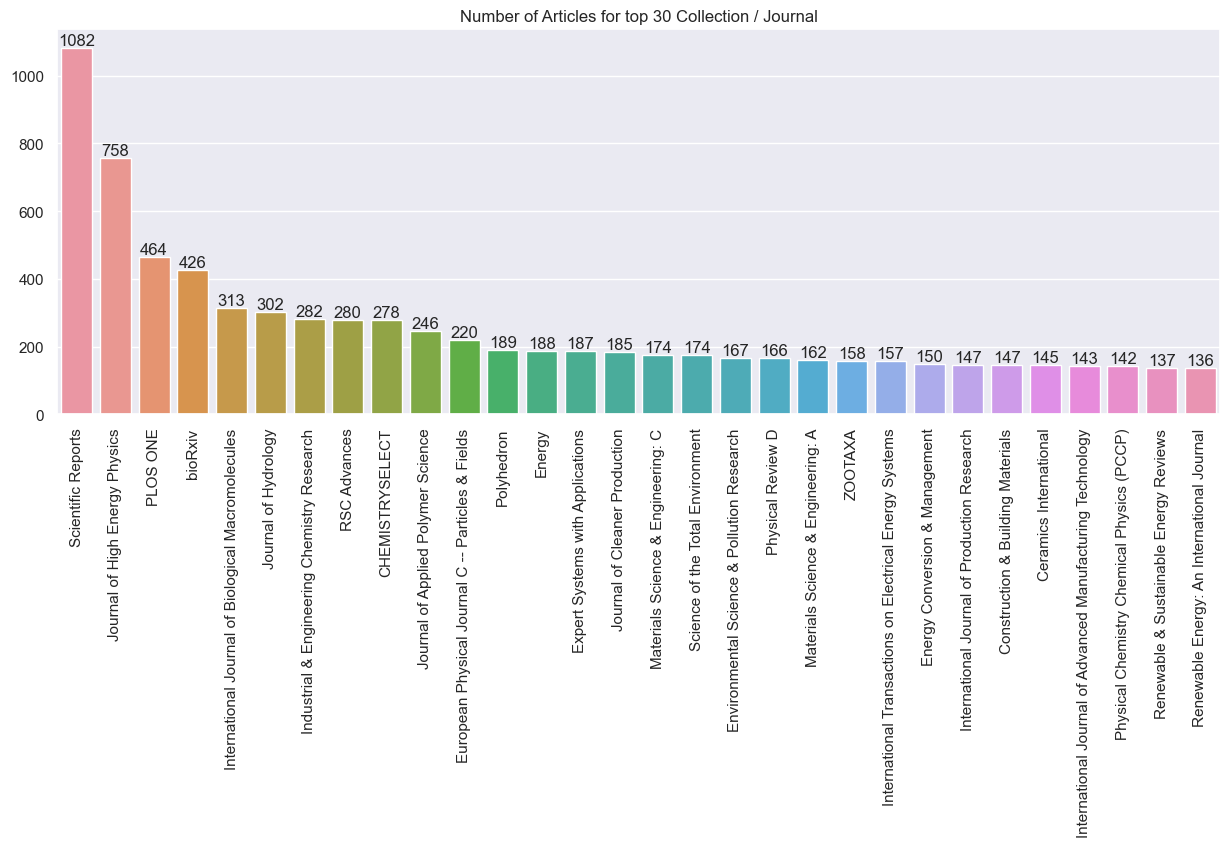

In [6]:
x = list(df['Journal/Collection_Title'].value_counts().head(30).index)
y = list(df['Journal/Collection_Title'].value_counts().head(30))
plt.figure(figsize=(15, 5))
ax = sns.barplot(x=x, y=y)
ax.bar_label(ax.containers[0])
plt.title('Number of Articles for top 30 Collection / Journal')
plt.xticks(rotation=90)
plt.show()

In the plot below, you can see the top 30 Publisher in which universities have published their research output.

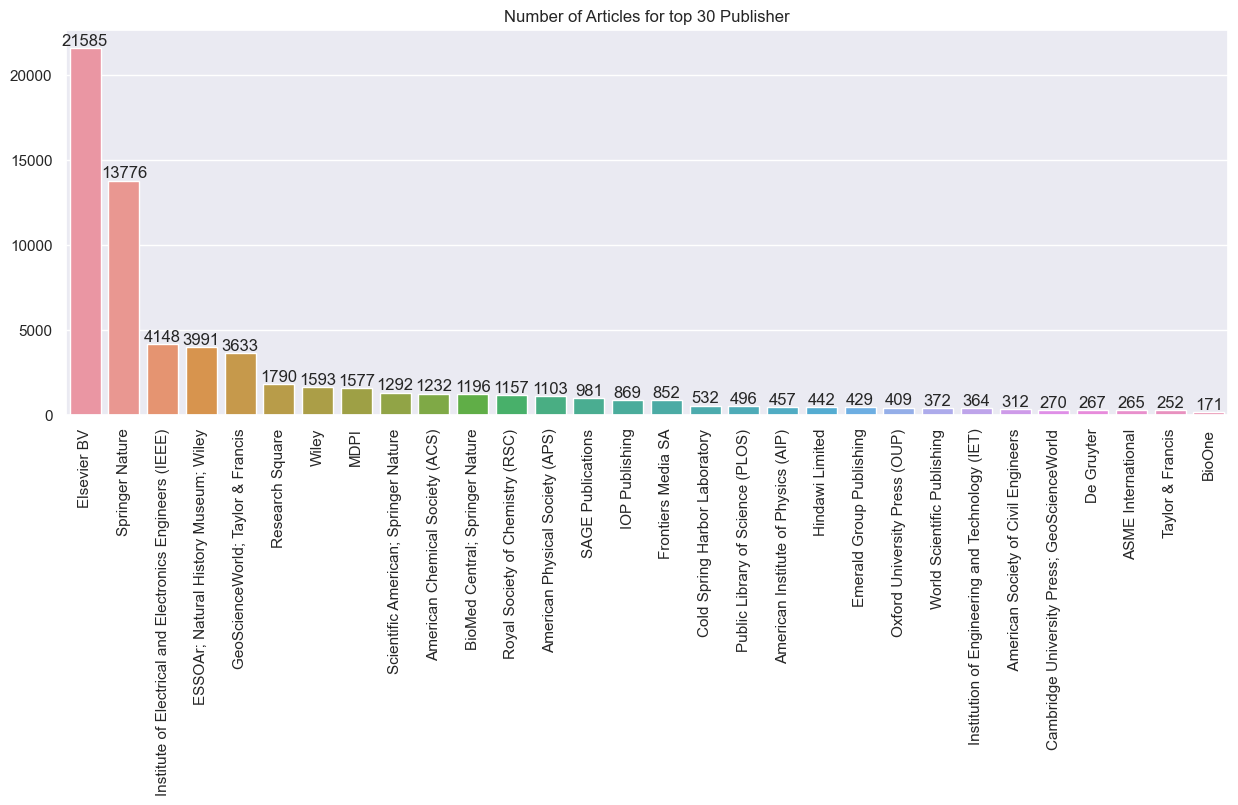

In [7]:
x = list(df['Publisher_Names'].value_counts().head(30).index)
y = list(df['Publisher_Names'].value_counts().head(30))
plt.figure(figsize=(15, 5))
ax = sns.barplot(x=x, y=y)
ax.bar_label(ax.containers[0])
plt.title('Number of Articles for top 30 Publisher')
plt.xticks(rotation=90)
plt.show()

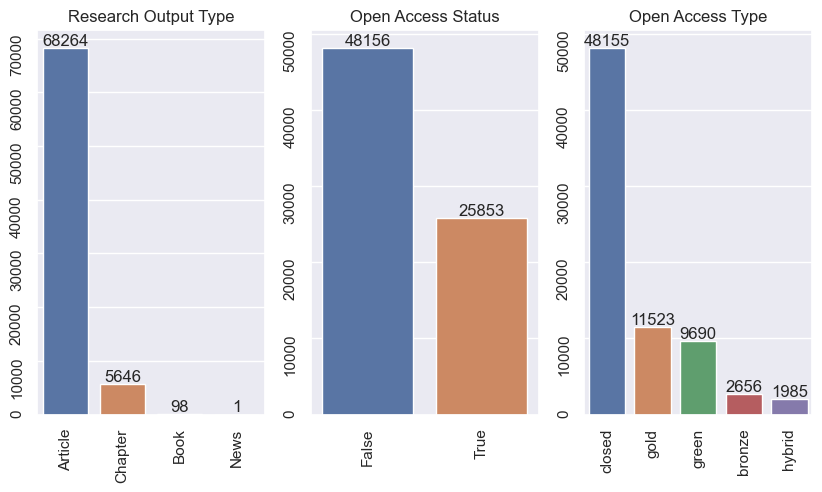

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
x = [
    list(df['Output_Type'].value_counts().index),
    list(df['OA_Status'].value_counts().index),
    list(df['OA_Type'].value_counts().index),
]
y = [
    list(df['Output_Type'].value_counts()),
    list(df['OA_Status'].value_counts()),
    list(df['OA_Type'].value_counts()),

]
sns.barplot(ax=axes[0], x=x[0], y=y[0])
axes[0].set_title('Research Output Type')
axes[0].bar_label(axes[0].containers[0])
axes[0].tick_params(labelrotation=90)

sns.barplot(ax=axes[1], x=x[1], y=y[1])
axes[1].set_title('Open Access Status')
axes[1].bar_label(axes[1].containers[0])
axes[1].tick_params(labelrotation=90)

sns.barplot(ax=axes[2], x=x[2], y=y[2])
axes[2].set_title('Open Access Type')
axes[2].bar_label(axes[2].containers[0])
axes[2].tick_params(labelrotation=90)


plt.show()

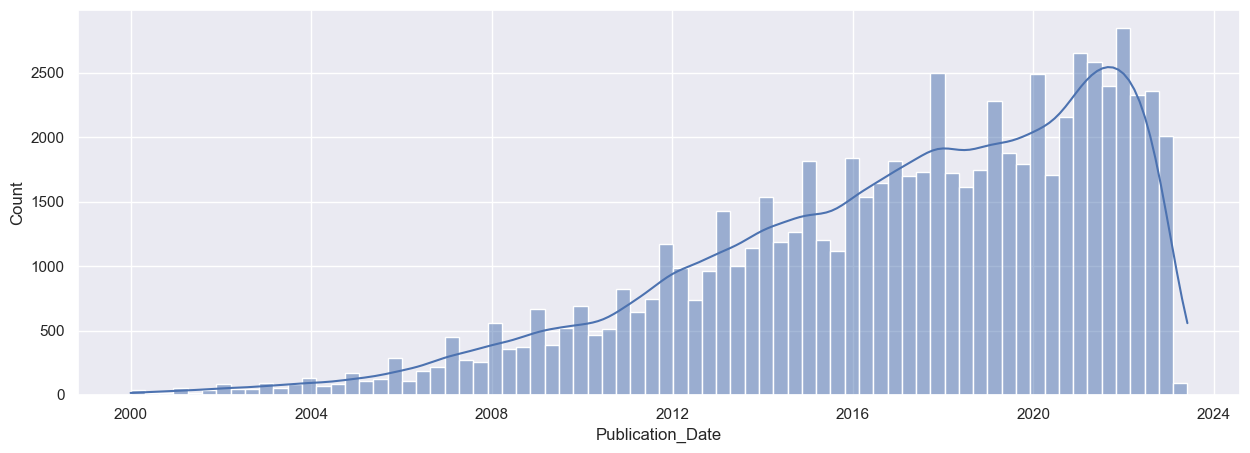

In [9]:
plt.figure(figsize=(15, 5))
ax = sns.histplot(data=df.loc[df['Publication_Date'] >= '2000'], x='Publication_Date', kde=True)
ax.bar_label(ax.containers[0])
plt.show()

In [10]:
df.describe()

,Altmetric_Attention_Score,News_mentions,Blog_mentions,Policy_mentions,Patent_mentions,Twitter_mentions,Peer_review_mentions,Weibo_mentions,Facebook_mentions,Wikipedia_mentions,Google+_mentions,LinkedIn_mentions,Reddit_mentions,Pinterest_mentions,F1000_mentions,Q&A_mentions,Video_mentions,Number_of_Mendeley_readers,Number_of_Dimensions_citations,Output_Type_LE,OA_Status_LE
count,74009.000000,74009.000000,74009.000000,74009.000000,74009.000000,74009.000000,74009.000000,74009.000000,74009.000000,74009.000000,74009.000000,74009.000000,74009.000000,74009.000000,74009.000000,74009.000000,74009.000000,74009.000000,74009.000000,74009.000000,74009.000000
mean,3.067195,0.138929,0.039576,0.018228,0.161872,2.469929,0.020822,0.000189,0.081828,0.071640,0.009904,0.000014,0.007526,0.000041,0.000919,0.001040,0.008594,34.362929,21.984380,0.153941,1.462133
std,33.615673,2.703754,0.400570,0.190594,1.664764,46.029952,0.289693,0.022659,0.766598,1.365636,0.243656,0.003676,0.121293,0.006367,0.035627,0.033874,0.168230,68.950118,59.464531,0.531887,0.862054
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2.000000,0.000000,1.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,9.000000,0.000000,1.000000
75%,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,24.000000,0.000000,2.000000
max,4568.000000,290.000000,34.000000,12.000000,248.000000,8949.000000,19.000000,4.000000,109.000000,227.000000,34.000000,1.000000,11.000000,1.000000,4.000000,2.000000,17.000000,2915.000000,8264.000000,3.000000,4.000000


In the next cell we are going to visualize a scatter plot for each feature pair. Since we have a good amount of features in the dataset, this plot will be huge. To mitigate this problem, we will remove features with less than 0.25 standard deviation. The Standard Deviation Values are presented in the table above.

In [11]:
target_features = list(df.describe().columns[:-2])
temp = []
for feature in target_features:
    if df.describe()[feature]['std'] >= 0.25:
        temp.append(feature)
target_features = temp
axes = pd.plotting.scatter_matrix(df[target_features], figsize=(50, 30), s=100)
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
plt.show()

In [ ]:
df.head()

,Altmetric_Attention_Score,Title,Journal/Collection_Title,Output_Type,OA_Status,OA_Type,Subjects_(FoR),Affiliations_(GRID),Publication_Date,News_mentions,Blog_mentions,Policy_mentions,Patent_mentions,Twitter_mentions,Peer_review_mentions,Weibo_mentions,Facebook_mentions,Wikipedia_mentions,Google+_mentions,LinkedIn_mentions,Reddit_mentions,Pinterest_mentions,F1000_mentions,Q&A_mentions,Video_mentions,Number_of_Mendeley_readers,Number_of_Dimensions_citations,Publisher_Names,University,Output_Type_LE,OA_Status_LE
0,1629,COVID-19 and male reproductive function: a pro...,Reproduction,Article,True,bronze,11 Medical and Health Sciences; 1114 Paediatri...,Allameh Tabataba'i University; University of G...,2021-03-01,87,1,0,0,2537,0,0,2,1,0,0,0,0,0,0,0,112,50,NaN,Allameh Tabataba'i University,0,0
1,906,The effects of three different exercise modali...,Reproduction,Article,True,bronze,11 Medical and Health Sciences; 1103 Clinical ...,"Academic Center for Education, Culture and Res...",2017-02-01,128,1,0,0,22,0,0,6,0,2,0,1,0,0,0,0,117,38,NaN,Allameh Tabataba'i University,0,0
2,239,"Fear, Loss, Social Isolation, and Incomplete G...",Basic And Clinical Neuroscience,Article,True,gold,11 Medical and Health Sciences; 1117 Public He...,Allameh Tabataba'i University; Charles R. Drew...,2020-07-30,30,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,190,52,NaN,Allameh Tabataba'i University,0,2
3,175,Foundations of Social Policy and Welfare in Islam,NaN,Chapter,False,closed,16 Studies in Human Society; 1605 Policy and A...,Allameh Tabataba'i University,2020-12-19,21,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,2,Springer Nature,Allameh Tabataba'i University,2,1
4,102,Laughter yoga versus group exercise program in...,International Journal of Geriatric Psychiatry,Article,True,green,11 Medical and Health Sciences; 1103 Clinical ...,Allameh Tabataba'i University; Imam Khomeini H...,2010-09-16,9,3,2,0,3,0,0,0,1,0,0,0,0,0,0,0,317,131,ESSOAr; Natural History Museum; Wiley,Allameh Tabataba'i University,0,3
